# Trees and Graphs
**Trees vs. Binary Trees**
A binary tree is a tree in which each node has up to two children . Not all trees are binary trees. For example,
this tree is not a binary tree. You could call it a ternary tree.

**Binary Tree vs. Binary Search Tree**
A binary search tree is a binary tree in which every node fits a specific ordering property: a left descendents <= n < all right descendents.This must be true for each node n.

**Balanced vs. Unbalanced**
Note that balancing a tree does not mean the left and right subtrees are exactly the same size.One way to think about it is that a "balanced" tree really means something more like "not terribly imbalanced:'It's balanced enough to ensure O(log n) times for insert and find,but it's not necessarily as balanced as it could be.

**Complete Binary Trees**
A complete binary tree is a binary tree in which every level of the tree is fully filled, except for perhaps the
last level. To the extent that the last level is filled, it is filled left to right.

**Full Binary Trees**
A full binary tree is a binary tree in which every node has either zero or two children.That is, no nodes have
only one child.

**Perfect Binary Trees**
A perfect binary tree is one that is both full and complete. All leaf nodes will be at the same level, and this
level has the maximum number of nodes.

**In-Order Traversal**
In-order traversal means to "visit" (often, print) the left branch, then the current node, and finally, the right branch.
Pre-Order Traversal
Pre-order traversal visits the current node before its child nodes (hence the name "pre-order").
Post-Order Traversal
Post-order traversal visits the current node after its child nodes (hence the name "post-order").

**Binary Heaps (Min-Heaps and Max-Heaps)**
We'll just discuss min-heaps here. Max-heaps are essentially equivalent, but the elements are in descending order rather than ascending order.

A min-heap is a complete binary tree (that is, totally filled other than the rightmost elements on the last level) where each node is smaller than its children. The root, therefore, is the minimum element in the tree

We have two key operations on a min-heap: insert and extract_min. Insert
When we insert into a min-heap, we always start by inserting the element at the bottom.We insert at the rightmost spot so as to maintain the complete tree property.

Then, we "fix" the tree by swapping the new element with its parent, until we find an appropriate spot for the element. We essentially bubble up the minimum element.


## 785. Is Graph Bipartite?
<div class="alert alert-block alert-success">
Given an undirected graph, return true if and only if it is bipartite.

Recall that a graph is bipartite if we can split it's set of nodes into two independent subsets A and B such that every edge in the graph has one node in A and another node in B.

The graph is given in the following form: graph[i] is a list of indexes j for which the edge between nodes i and j exists.  Each node is an integer between 0 and graph.length - 1.  There are no self edges or parallel edges: graph[i] does not contain i, and it doesn't contain any element twice.

Example 1:
Input: [[1,3], [0,2], [1,3], [0,2]] <br>
Output: true <br>
Explanation: The graph looks like this: <br>
0----1 <br>
|    | <br>
|    | <br>
3----2 <br>
We can divide the vertices into two groups: {0, 2} and {1, 3}.
</div>

We try to use two colors to color the graph and see if there are any adjacent nodes having the same color.

Initialize a color[] array for each node. Here are three states for colors[] array:
1. 0: Haven't been colored yet.
1. 1: Blue.
1. -1: Red.

For each node,

* If it hasn't been colored, use a color to color it. Then use the other color to color all its adjacent nodes (DFS).
* If it has been colored, check if the current color is the same as the color that is going to be used to color it. 

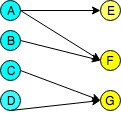

In [ ]:
def isBipartite(graph):
        color = {}
        def dfs(pos):
            for i in graph[pos]:
                if i in color:
                    if color[i] == color[pos]: return False
                else:
                    color[i] = -color[pos]
                    if not dfs(i): return False
            return True
        for i in range(len(graph)):
            if i not in color: color[i] = 1
            if not dfs(i): return False
        return True
print(isBipartite([[1,3],[0,2],[1,3],[0,2]]))


In [ ]:
import collections
def isBipartite(graph):        
    n, colored = len(graph), {}
    for i in range(n):
        if i not in colored :
            colored[i] = 1
            q = collections.deque([i])
            while q:
                cur = q.popleft()
                for nb in graph[cur]:
                    if nb not in colored:
                        colored[nb] = -colored[cur]
                        q.append(nb)
                    elif colored[nb] == colored[cur]:
                        return False
    return True

print(isBipartite([[1,3],[0,2],[1,3],[0,2]]))

## 102. Binary Tree Level Order Traversal
<div class="alert alert-block alert-success">
Given a binary tree, return the level order traversal of its nodes' values. (ie, from left to right, level by level).
</div>
Some level order traversal questions.

* Binary Tree Level Order Traversal
* Binary Tree Level Order Traversal II
* Binary Tree Zigzag Level Order Traversal
* Average of Levels in Binary Tree
* Binary Tree Right Side View
* Find Largest Value in Each Tree Row
* Populating Next Right Pointers in Each Node



In [ ]:
def levelOrder(self, root):
    if not root:
        return []
    queue = [[root]]
    for level in queue:
        lists = []
        for node in level:
            if node.left:
                lists.append(node.left)
            if node.right:
                lists.append(node.right)
        if lists:
            queue.append(lists)
    return [[x.val for x in level] for level in queue]


In [ ]:
class TreeNode:
    def __init__(self, x):
            self.val = x
            self.left = None
            self.right = None

def levelOrder(root):
    res = []
    if not root:
        return res
    dfs(res,root,1)
    return res;
        
def dfs(res, node, level):
    if not node:
        return
    cur = []
    if level > len(res): # reach new level
        res.append([node.val])
    else:
        res[level-1].extend([node.val])
    self.dfs(res,node.left, level+1)
    self.dfs(res,node.right,level+1)

Given a binary tree, return the bottom-up level order traversal of its nodes' values. (ie, from left to right, level by level from leaf to root).

In [ ]:
def levelOrderBottom(self, root):
    stack = [(root,0)]
    res =[]
    while stack:
        node,level = stack.pop()
        if node:
            if level +1 > len(res):
                res.insert(0,[])
            res[-(level+1)].append(node.val)
            stack.append()

## 114. Flatten Binary Tree to Linked List
<div class="alert alert-block alert-success">
Given a binary tree, flatten it to a linked list in-place.

For example, given the following tree:
<br>
    1<br>
   / \<br>
  2   5<br>
 / \   \<br>
3   4   6<br>
The flattened tree should look like:
<br>
 1<br>
  \<br>
   2<br>
    \<br>
     3<br>
      \<br>
       4<br>
        \<br>
         5<br>
          \<br>
           6<br>
</div>

In [ ]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.data,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.data)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"

def flatten1(self,root):
    def helper(root):
        if not root:
            return None
        helper(root.left)
        helper(root.right)

        root.right = self.prev
        root.left = None
        self.prev = root
    self.prev = TreeNode(0)
    helper(root)
    
def flatten_dfs_iter(root):
    last = TreeNode(-1)
    stack = [root]
    while stack:
        node = stack.pop()
        last.right = node
        last.left =None
        
        if node and node.right:
            stack.append(node.right)
        if node and node.left:
            stack.append(node.left)
        last = node
        
tree1 = TreeNode(1,TreeNode(2,TreeNode(3),TreeNode(4)),TreeNode(5,None,TreeNode(6)))
print(str(tree1))
#flatten_dfs_iter(tree1)
self.flatten1(tree1)
print(str(tree1))

## 450. Delete Node in a BST
<div class="alert alert-block alert-success">
Given a root node reference of a BST and a key, delete the node with the given key in the BST. Return the root node reference (possibly updated) of the BST.

Note: Time complexity should be O(height of tree).

Example:

root = [5,3,6,2,4,null,7]

key = 3

<br>
    5<br>
   / \<br>
  3   6<br>
 / \   \<br>
2   4   7<br>

Given key to delete is 3. So we find the node with value 3 and delete it.

One valid answer is [5,4,6,2,null,null,7], shown in the following BST.

<br>
    5 <br>
   / \ <br>
  4   6 <br>
 /     \ <br>
2       7 <br>

Another valid answer is [5,2,6,null,4,null,7].

<br>
    5 <br>
   / \ <br>
  2   6 <br>
   \   \ <br>
    4   7 <br>
</div>
**Approach 1**: Recursive

1. Recursively find the node that has the same value as the key, while setting the left/right nodes equal to the returned subtree
1. Once the node is found, have to handle the below 4 cases
- node doesn't have left or right - return null
- node only has left subtree- return the left subtree
- node only has right subtree- return the right subtree
- node has both left and right - find the minimum value in the right subtree, set that value to the currently found node, then recursively delete the minimum value in the right subtree

In [ ]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.val,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.val)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"

def deleteNode(root, key):
    def findMin(node):
        while node.left:
            node = node.left
        return node

    if not root:
        return root

    if key < root.val: # find the node in the left subtree
        root.left = deleteNode(root.left,key)
    elif key > root.val: # find the node in the right subtree
        root.right = deleteNode(root.right,key)
    else: # found, start to delete it
        if not root.left: # if no right child
            return root.right
        if not root.right: # if no left child, 
            return root.left
        # if node have both righ and left child, delete min node in right subtree
        minNode = findMin(root.right)
        root.val = minNode.val
        root.right = deleteNode(root.right,root.val)
    return root

tree = TreeNode(5,TreeNode(3,TreeNode(2),TreeNode(4)),TreeNode(6,None,TreeNode(7)))
print(str(tree))
deleteNode(tree, 3)
print(str(tree))

## 108. Convert Sorted Array to Binary Search Tree

<div class="alert alert-block alert-success">
Given an array where elements are sorted in ascending order, convert it to a height balanced BST.

For this problem, a height-balanced binary tree is defined as a binary tree in which the depth of the two subtrees of every node never differ by more than 1.

Example:

Given the sorted array: [-10,-3,0,5,9],

One possible answer is: [0,-3,9,-10,null,5], which represents the following height balanced BST:
<br>
      0 <br>
     / \ <br>
   -3   9 <br>
   /   / <br>
 -10  5 <br>

</div>
For a sorted array, the left half will be in the left subtree, middle value as the root, right half in the right subtree. This holds through for every node. Many of the approaches here suggest slicing an array recursively and passing them. However, slicing the array is expensive. It is better to pass the left and right bounds into recursive calls instead.

## 109. Convert Sorted List to Binary Search Tree
**Approach 1:** convert sorted List to Array, then do convert array to BST. This approach is a classic example of the time-space tradeoff: you can get the time complexity down by using more space.
**Aproach 2:** Since we are given a linked list and not an array, we don't really have access to the elements of the list using indexes. We want to know the middle element of the linked list.

We can use the two pointer approach for finding out the middle element of a linked list

Once we have the middle element of the linked list, we disconnect the portion of the list to the left of the middle element. The way we do this is by move fast 1 node ahead

In [ ]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.val,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.val)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"
class ListNode():
    def __init__(self, data, next=None):
        self.val, self.next = data, next
    def __str__(self):
        string = str(self.val)
        if self.next: string += ',' + str(self.next)
        return string
    
def sortedArray2BST(nums):
    def helper(nums,start,end):
        if start > end:
            return None
        if start == end:
            return TreeNode(nums[start])
        mid  = start + (end-start)//2
        return TreeNode(nums[mid],helper(nums,start,mid-1),helper(nums,mid+1,end))
    return helper(nums,0,len(nums)-1)

def sortedListToBST(head):
    if not head:
        return None # if head not exist, then linkedlist is empty
    if not head.next: 
        return TreeNode(head.val) # just one node
    # find the middle node
    slow,fast = head,head.next
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    
    root = slow.next
    slow.next = None # cut the left
    dummy = TreeNode(root.val,sortedListToBST(head),sortedListToBST(root.next))
    return dummy

#root = sortedArray2BST([-10,-3,0,5,9])
#print(str(root))

l1 = ListNode(-10,ListNode(-3,ListNode(0,ListNode(5,ListNode(9)))))
print(str(l1))
print(str(sortedListToBST(l1)))

## 106. Construct Binary Tree from Inorder and Postorder Traversal
## 105. Construct Binary Tree from Preorder and Inorder Traversal
<div class="alert alert-block alert-success">
Given inorder and postorder traversal of a tree, construct the binary tree.

Note:
You may assume that duplicates do not exist in the tree.

For example, given

inorder = [9,3,15,20,7]
postorder = [9,15,7,20,3]
Return the following binary tree:
<br>
     3<br>
    / \ <br>
    9  20 <br>
      /  \ <br>
    15   7 <br>
<br>
  9,     3,    15,   20,    7 <br>
..left..root ......right..... <br>
  9,    15,   7,   20,     3       <br>
..left.. ....right.... ..root..  <br>
</div>
**Aproach 1: O(n) time , O(n) space** 
Divide and Conquer

The the basic idea is to take the last element in postorder array as the root, find the position of the root in the inorder array; then locate the range for left sub-tree and right sub-tree and do recursion. Suffers the same problem of being O(n^2) time, O(logn) space due to linear searching for the root value in inorder. Use a HashMap to record the index of root in the inorder array to O(n) time, O(n) space.
inorder: (inorderof left subtree) root ( inorder of right subtree)
postorder: (postorder of left subtree) ( postorder of right subtree) root

**Aproach 2: O(n) time , O(logn) space ** 

After we have taken the first element in Postorder as the root of the tree, there's two options for the next element in the list;

1. There is a right branch, in which case the next element is the root of the right branch
1. There is no right branch, in which case the next element is the root of the left branch
How to decide which case we have? Well consider the impact on inplace in both cases. In case 1. there will be something in inorder before the root element is found, where as the root value will appear immediately if there is no left branch.

Using the knowledge of which case gives the next course of action.

1. Create the right root using the next element in postorder and recurse around.
1. Create the left root using the next element in postorder and recurse around.

The last thing we need to consider is when the we've completed the current branch we're building and when to unroll. That's actually pretty easy to answer, if, as we process the inorder list, we encounter the root value of the parent node, the branch has been completed. Thus we need to simply pass in the root's value each time we recurse around.


The core idea is: Starting from the last element of the postorder and inorder array, we put elements from postorder array to a stack and each one is the right child of the last one until an element in postorder array is equal to the element on the inorder array. Then, we pop as many as elements we can from the stack and decrease the mark in inorder array until the peek() element is not equal to the mark value or the stack is empty. Then, the new element that we are gonna scan from postorder array is the left child of the last element we have popped out from the stack

In [11]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.val,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.val)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"
def buildTree(inorder,postorder):
    if not inorder:
        return None
    root = TreeNode(postorder.pop())
    root_index = inorder.index(root.val)
    root.right = buildTree(inorder[root_index+1:],postorder)
    root.left = buildTree(inorder[:root_index],postorder)
    return root

def buildTree_Map(inorder,postorder):
    def helper(inorder,postorder,start,end,inorderMap):
        if start > end:
            return None
        root = TreeNode(postorder.pop()) # root is the last one in postorder
        index = inorderMap[root.val]
        ## build left and right subtree recursively
        root.right = helper(inorder,postorder,index+1,end,inorderMap)
        root.left = helper(inorder,postorder,start,index-1,inorderMap)
        return root
    
    inorderMap = { inorder[i]: i for i in range(len(inorder))}
    return helper(inorder,postorder,0,len(inorder)-1,inorderMap)
        
def buildTree_Iter(preorder, inorder):
    if not preorder:
        return None
    root = TreeNode(preorder[0])
    stack = [root]
    i,j = 1,0
    while i < len(preorder):
        tmp =None
        cur = TreeNode(preorder[i])
        while stack and stack[-1].val == inorder[j]: # complete subtree
            tmp = stack.pop()
            j +=1
        if tmp:
            tmp.right = cur
        else:
            stack[-1].left = cur

        stack.append(cur)
        i += 1
    return root
print(str(buildTree_Map([9,3,15,20,7],[9,15,7,20,3])))

(3(9..)(20(15..)(7..)))
